<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt   #for plotting the graph
import seaborn as sns             #for plotting
import pandas as pd
plt.style.use("ggplot")

%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8  #defining the size of image

In [10]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [19]:
scores = data[['DMV_Test_1','DMV_Test_2']].values
results = data['Results'].values
print(scores.shape)
print(results.shape)
print(results)

(100, 2)
(100,)
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


### Task 3: Visualize the Data
---

[False] [ True]


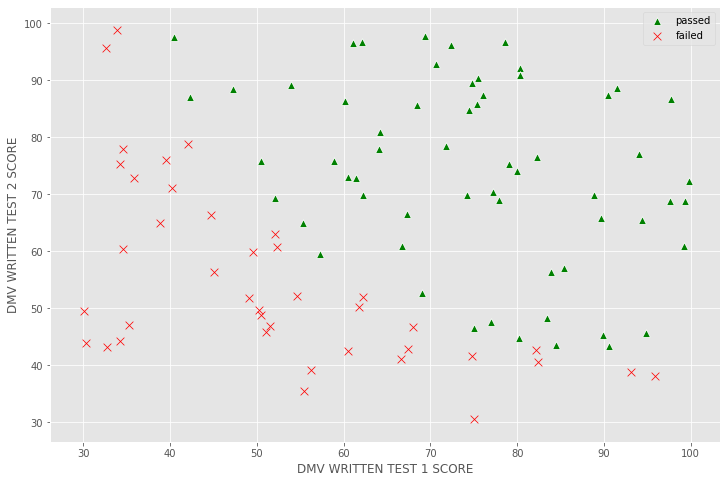

In [18]:
passed = (results==1).reshape(100,1)
failed = (results==0).reshape(100,1)
print(passed[0],failed[0])
ax = sns.scatterplot(x = scores[passed[:, 0],0],
                     y = scores[passed[:, 0],1],  ### 0 is to take all the values and 1 is the index of scores
                     marker = "^",
                     color = 'green',
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0],0],
                y = scores[failed[:, 0],1],
                marker = "x",
                color = 'red',
                s = 60)
ax.set(xlabel="DMV WRITTEN TEST 1 SCORE", ylabel="DMV WRITTEN TEST 2 SCORE")
ax.legend(['passed','failed'])
plt.show();

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def logistic_function(x):
    return 1/(1+np.exp(-x))

In [8]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
def compute_cost(theta,x,y):
    m = len(y)
    y_pred = logistic_function(np.dot(x,theta))
    error= (y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)
    cost = (-1/m)*(error)

### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$